Let's see how many different ways we can solve a single differential equation.

As an example, let's try the convective diffusion problem:

$$\frac{d^2c}{dx^2} - Pe\frac{dc}{dx} = 0, c(0)=1, c(1)=0$$

Giving the equation a quick glance, we can classify the problem as a homogeneous linear second-order ODE BVP.

# Characteristic Equation

To find the undetermined coefficients solution, write out the characteristic equation:

$$r^2 - Per = 0 $$

The roots of the characteristic equation are r = 0, Pe. This gives us the general solution:

$$c = c_1 + c_2 e^{Pex} $$

Plugging in our two initial conditions, we find the following values for $c_1$ and $c_2$:

$$c_1 = \frac{-e^{Pe}}{1 - e^{Pe}}, c_2 = \frac{1}{1 - e^{Pe}} $$

This gives the final solution:

$$c = \frac{e^{Pe} - e^{Pex}}{e^{Pe} - 1} $$

# Exponential Matrix

Rewrite the equation of a system of linear ODEs:

$$Y_1 = c, Y_2 = \frac{dc}{dx}$$ <br>
$$(1) \frac{dc}{dx} = Y_2 $$ <br>
$$(2) \frac{d^2c}{dx^2} = PeY_2$$

Rewrite the system of equations in matrix form:

$$\frac{d\textbf{Y}}{dx} = 
  \left[ {\begin{array}{cc}
   0 & 1\\
   0 & Pe\\
  \end{array} } \right]
  \left[ {\begin{array}{c}
   Y_1\\
   Y_2\\
  \end{array} } \right]$$

Solving for the eigenvalues gives $\lambda = 0, Pe$. To solve for the eigenvectors,

$\lambda=0$:

$$\left[ {\begin{array}{cc}
   0 & 1\\
   0 & Pe\\
  \end{array} } \right]
  \left[ {\begin{array}{c}
   X\\
   Y\\
  \end{array} } \right]
$$

Setting X=1 gives Y=0. This gives the eigenvector $\bigg( \begin{array}{c}
  1\\
  0\\
  \end{array} \bigg) $
  
$\lambda=Pe$:

$$\left[ {\begin{array}{cc}
   -Pe & 1\\
   0 & 0\\
  \end{array} } \right]
  \left[ {\begin{array}{c}
   X\\
   Y\\
  \end{array} } \right]
$$

Setting X=1 gives Y=Pe. This gives the eigenvector $\bigg( \begin{array}{c}
  1\\
  Pe\\
  \end{array} \bigg) $

The matrix exponential is found via the equation $e^{At} = SDS^{-1}$, where S is the matrix made of the eigenvectors and D is the diagonal exponential matrix of eigenvalues:


$$S = 
   \left[ {\begin{array}{cc}
   1 & 1\\
   Pe & 0\\
  \end{array} } \right],
  D = 
  \left[ {\begin{array}{cc}
   e^{Pex} & 0\\
   0 & 1\\
  \end{array} } \right],
  S^{-1} = \frac{1}{Pe}
  \left[ {\begin{array}{cc}
   0 & 1\\
   Pe & -1\\
  \end{array} } \right]
$$ <br>

$$SD = 
   \left[ {\begin{array}{cc}
   1 & 1\\
   Pe & 0\\
  \end{array} } \right]
  \left[ {\begin{array}{cc}
   e^{Pex} & 0\\
   0 & 1\\
  \end{array} } \right] = 
  \left[ {\begin{array}{cc}
   e^{Pex} & 1\\
   Pee^{Pex} & 0\\
  \end{array} } \right]
$$ <br>

$$SDS^{-1} = \frac{1}{Pe}
   \left[ {\begin{array}{cc}
   e^{Pex} & 1\\
   Pee^{Pex} & 0\\
  \end{array} } \right]
  \left[ {\begin{array}{cc}
   0 & 1\\
   Pe & -1\\
  \end{array} } \right] = 
  \left[ {\begin{array}{cc}
   1 & \frac{1}{Pe}(e^{Pex} - 1)\\
   0 & e^{Pex}\\
  \end{array} } \right]
$$

Solving via the matrix exponential,

$$\textbf{Y} = e^{Ax}C $$

where C is the matrix of initial conditions.

$$\textbf{Y} = 
  \left[ {\begin{array}{cc}
   1 & \frac{1}{Pe}(e^{Pex} - 1)\\
   0 & e^{Pex}\\
  \end{array} } \right]
  \left[ {\begin{array}{c}
   1\\
   C_2\\
  \end{array} } \right]
$$

where $C_2$ is a constant we have to solve for using the second boundary value.

Writing out the first equation in our solved system of equations:

$$C = 1 + \frac{C_2}{Pe}(e^{Pex} - 1)$$

Solving for the constant gives:

$$C_2 = \frac{Pe}{1 - e^{Pe}} $$

Plugging in and rearranging gives:

$$C = \frac{e^{Pe} - e^{Pex}}{e^{Pe} - 1} $$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 101)
Pez = [0.01, 0.1, 1, 10, 100]
fig, ax = plt.subplots()

for i, Pe in enumerate(Pez):
    y = (np.exp(Pe) - np.exp(Pe*x))/(np.exp(Pe)-1)
    ax.plot(x, y, label = 'Pe = {}'.format(Pe))

ax.legend()
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('C', fontsize=16)


# Laplace Integrals

The problem

$$\frac{d^2c}{dx^2} - Pe\frac{dc}{dx} = 0, c(0)=1, c(1)=0$$

can be converted to a Laplace integral:

$$s^2F(s) - s(1) - \alpha - Pe [sF(s) - 1] = 0 $$

where $\alpha$ is a constant to be found with the second boundary condition.

Rearranging gives:

$$F(s) = \frac{s + \beta}{s^2 - Pes}, \beta = \alpha - Pe $$

Separating the denominator gives:

$$F(s) = \frac{1 + \gamma}{s - Pe} - \frac{\gamma}{s}, \gamma = \frac{\beta}{Pe} = \frac{\alpha - Pe}{Pe} $$

Using the inverse Laplace transform gives:

$$c = (1+\gamma)e^{Pex} - \gamma$$

Plugging in the boundary condition c(1) = 0 and solving for $\gamma$ gives:

$$\gamma = \frac{e^{Pe}}{1 - e^{Pe}}$$

Substituting gives the final solution for c:

$$c = \frac{e^{Pe} - e^{Pex}}{e^{Pe} - 1} $$

which is what we found with the previous method. Sanity check!

# Numerical methods: Euler forward

First, we need to express the second order differential equation as a system of two first order equations:

$$Y_1 = c, Y_2 = \frac{dc}{dx}$$ <br>
$$(1) \frac{dc}{dx} = Y_2 $$ <br>
$$(2) \frac{d^2c}{dx^2} = PeY_2$$

The solution using Euler forward for this set of equations can be expressed as:

$$Y_1^{k+1} = Y_1^k + \Delta t Y_2^k$$ <br>
$$Y_2^{k+1} = Y_2^k + \Delta t PeY_2^k$$

To solve this system of equations, we need to know the initial conditions for both $Y_1$ and $Y_2$. We only have the initial condition for $Y_1$. The other boundary condition is the final value of $Y_1$. We will need to make an initial guess of $Y_2(0)$, integrate, and update our answer until $Y_1(1) = 0$

0.01
Converged in 3 loops
0.1
Converged in 3 loops
1
Converged in 3 loops
10
Converged in 3 loops
100
Converged in 5 loops


Text(0,0.5,'C')

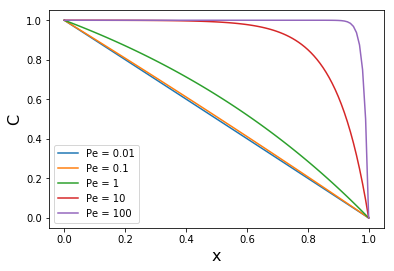

In [3]:
# Boundary conditions:
y0 = 1
yf = 0

# Initial guess for dcdx:

x = np.linspace(0, 1, 101)
dt = x[1]
Pez = [0.01, 0.1, 1, 10, 100]
fig, ax = plt.subplots()

for Pe in Pez:
    print(Pe)
    tol = 1000
    counter = 0
    yp0a = 0.5
    yp0b = 0.4
    while tol > 0.01:
        ya = np.zeros(101)
        yb = np.zeros(101)
        ypa = np.zeros(101)
        ypb = np.zeros(101)

        ypa[0] = yp0a
        ypb[0] = yp0b
        ya[0] = y0
        yb[0] = y0

        for i, yi in enumerate(ya):
            if i == 0:
                pass
            else:
                ypa[i] = ypa[i-1] + dt*Pe*ypa[i-1]
                ya[i] = ya[i-1] + dt*ypa[i-1]

                ypb[i] = ypb[i-1] + dt*Pe*ypb[i-1]
                yb[i] = yb[i-1] + dt*ypb[i-1]

        tol = (ya[-1] - yf)**2
        m = (ya[-1] - yb[-1])/(yp0a - yp0b)
        b = ya[-1] - m*yp0a
        yp0a = yp0b
        yp0b = -b/m
        counter += 1
    print('Converged in {} loops'.format(counter))
    
    ax.plot(x, ya, label = 'Pe = {}'.format(Pe))

ax.legend()
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('C', fontsize=16)

# Numerical methods: Scipy's odeint

Scipy has a built-in ODE solver `odeint`. We will still need to iterate, as `odeint` requires our boundary conditions to be in the form of initial conditions. Similar to the Euler forward method, we will need to express our second-order ODE in terms of a system of two first-order ODEs.

`odeint` requires the user to express the system of ODEs in the form of a function that outputs of list. Our function will outout:

$$[Y_2, PeY_2]$$,

the right-hand side of our system of first-order differential equations.

Note that there seems to be some limitations in our ability to solve the system of equations for high values of Pe. `odeint` breaks when Pe > 45.

In [116]:
from scipy.integrate import odeint, ode
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Pe = 1

def dU_dx(U, x):
    
    return [U[1], Pe*U[1]]


yf = 0

x = np.linspace(0, 1, 101)
sola = odeint(dU_dx, U0a, x)
ya = sola[:, 0]
solb = odeint(dU_dx, U0b, x)
yb = solb[:, 0]

0.01
Converged in 3 loops
0.1
Converged in 3 loops
1
Converged in 4 loops
10
Converged in 4 loops
40
Converged in 5 loops


Text(0,0.5,'C')

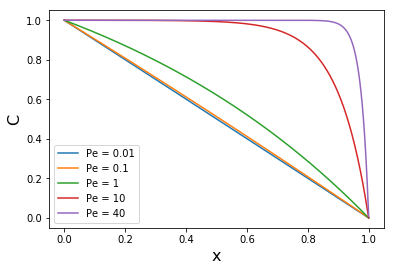

In [5]:
# Breaks if Pe exceeds 45
yf = 0
x = np.linspace(0, 1, 1001)
def dU_dx(U, x):
    
    return [U[1], Pe*U[1]]

Pez = [0.01, 0.1, 1, 10, 40]
fig, ax = plt.subplots()


for Pe in Pez:
    print(Pe)
    tol = 1000
    counter = 0
    yp0a = -10**(-16)
    yp0b = -2*10**(-10)
    while tol > 0.001:
        U0a = [1, yp0a]
        U0b = [1, yp0b]
        sola = odeint(dU_dx, U0a, x)
        ya = sola[:, 0]
        solb = odeint(dU_dx, U0b, x)
        yb = solb[:, 0]

        tol = (ya[-1] - yf)**2
        #print(tol)
        m = (ya[-1] - yb[-1])/(yp0a - yp0b)
        b = ya[-1] - m*yp0a
        yp0a = yp0b
        yp0b = -b/m
        counter += 1
        if counter > 40:
            break
    print('Converged in {} loops'.format(counter))
    
    ax.plot(x, ya, label = 'Pe = {}'.format(Pe))

ax.legend()
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('C', fontsize=16)

# Numerical methods: Scipy's ode

Scipy provide's users with a number of alternate ODE solvers in the class of functions in `ode`. The function `odeint` is a utility function that only uses one type of solver (known as lsoda). `ode` is a little more difficult to use, but we will write a wrapper function so that we can implement it in a similar fashion to `odeint`. 

In [164]:
# t1 = 1
# t0 = 0
# x = np.linspace(0, 1, 101)
# U0a = [1, -1]
# Pe = 1

## Alternate solvers using integrate.ode:

#name = 'lsoda',
#name = 'dopri5'
#name = 'dop853'
#name = 'vode', method = 'adams'
#name = 'vode', method = 'bdf'

#All methods seem to fail except for dopri5 when using large Pe.

def dU_dx(x, U):
    
    return [U[1], Pe*U[1]]

def ode_wrapper(dU_dx, U0, x):
    t1 = x[-1]
    dt = x[1]
    t = [t0]
    solver = ode(dU_dx)
    solver.set_integrator('dopri5', nsteps=10**5)
    solver.set_initial_value(U0, x[0])

    y = np.zeros(x.shape)
    y[0] = U0[0]
           
    counter = 0
    while solver.successful() and solver.t < t1:
        t.append(solver.t + dt)
        Unext = solver.integrate(solver.t + dt)
        y[counter+1] = Unext[0]
        #print(counter)
        counter += 1
        
    return y

0.01
0.1
1
10
100


C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


Text(0,0.5,'C')

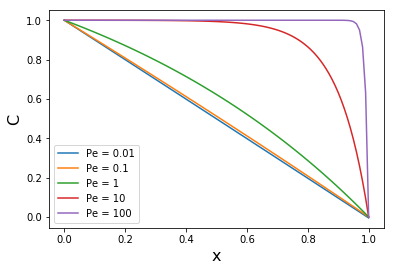

In [168]:
# Breaks if Pe exceeds 45
yf = 0
x = np.linspace(0, 1, 101)

Pez = [0.01, 0.1, 1, 10, 100]
fig, ax = plt.subplots()


for Pe in Pez:
    print(Pe)
    tol = 1000
    counter = 0
    yp0a = -0.8
    yp0b = -1.0
    while tol > 0.0001:
        U0a = [1, yp0a]
        U0b = [1, yp0b]
        sola = ode_wrapper(dU_dx, U0a, x)
        ya = sola
        solb = ode_wrapper(dU_dx, U0b, x)
        yb = solb

        tol = (ya[-1] - yf)**2
        #print(tol)
        m = (ya[-1] - yb[-1])/(yp0a - yp0b)
        b = ya[-1] - m*yp0a
        yp0a = yp0b
        yp0b = -b/m
        counter += 1
        if counter > 40:
            break
    #print('Converged in {} loops'.format(counter))
    
    ax.plot(x, ya, label = 'Pe = {}'.format(Pe))

ax.legend()
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('C', fontsize=16)